# Intervalos multi-dimensionales 

In [1]:
workspace()

In [41]:
using Intervalos
using PyPlot

INFO: Loading help data...


Para resolver problemas en más que una dimensión, será necesario poder calcular un *enclosure* ("encierro") de la imagen de una función sobre un conjunto en varias dimensiones.
Para ello, podemos definir **intervalos multi-dimensionales**, de manera análoga a los intervalos uni-dimensionales que ya conocemos.

[1] ¿Cuál sería una definición matemática razonable de un intervalo multi-dimensional?

Si denotamos un intervalo como

$X_n=[\overline{X}_n, \underline{X}_n]$

Por un intervalo multidimensional, se refiere a una tupla de n intervalos
$X=(X_1, X_2, ..., X_n)$.
Por ejemplo, un intervalo de dos dimensiones

$X = (X_1, X_2) = ([\overline{X}_1, \underline{X}_1],[\overline{X}_2, \underline{X}_2])$

donde, pictográficamente, estaríamos denotando un rectángulo en el plano-$x_1 x_2$: siendo un conjunto de puntos $(x_1, x_2)$,
tal que

$\overline{X}_1 \leq x_1 \leq \underline{X}_1$

$\overline{X}_2 \leq x_2 \leq \underline{X}_2$

[2] ¿Cómo podríamos expresar esto en Julia? Da dos posibilidades.

[Pista: Checa `typealias`]

In [2]:
module MultidimensionalIntervals

  using Intervalos
  import Base.exp, Base.log, Base.sin, Base.cos, Base.tan, Base.length, Base.contains
  export MultiInterval, +, -, *, /, contains, midpoint, Intersection

type MultiInterval
    N::Int
    intervalos::Vector{Interval}    
end

  function MultiInterval(intervalos::Array{Interval,1})
      if length(intervalos)==1 #En caso de ser sólo un intervalo regresa tal intervalo (hace algo similar a typealias)
          return intervalos[1]
      else
          MultiInterval(length(intervalos),intervalos)
      end
  end

  #SUMAS

  function +(X::MultiInterval, Y::MultiInterval)
      if length(X.intervalos)==length(Y.intervalos)
          Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,X.intervalos[i]+Y.intervalos[i])
          end
          return Z
      else
          error("No tienen la misma dimensión")
      end
  end

  function +(X::MultiInterval,N::Real)
      Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,X.intervalos[i]+N)
          end
  end

  function +(N::Real, X::MultiInterval)
      +(X,N)
  end



  #RESTAS

  function -(X::MultiInterval, Y::MultiInterval)
      if length(X.intervalos)==length(Y.intervalos)
          Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,X.intervalos[i]-Y.intervalos[i])
          end
          return Z
      else
          error("No tienen la misma dimensión")
      end
  end

  function +(X::MultiInterval,N::Real)
      Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,X.intervalos[i]-N)
          end
  end

  function -(N::Real, X::MultiInterval)
      -(X,N)
  end

  #Multiplicación

  function *(X::MultiInterval, Y::MultiInterval)
      if length(X.intervalos)==length(Y.intervalos)
          Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,X.intervalos[i]*Y.intervalos[i])
          end
          return Z
      else
          error("No tienen la misma dimensión")
      end
  end

    function *(N::Real,X::MultiInterval)
        Z=MultiInterval(length(X.intervalos),Interval[])
            for i=1:length(X.intervalos)
                push!(Z.intervalos,X.intervalos[i]*N)
            end
        Z
    end

    function *(X::MultiInterval, N::Real)
        *(N,X)
    end


  #División


  function /(X::MultiInterval, Y::MultiInterval)
      if length(X.intervalos)==length(Y.intervalos)
          Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,ExtendedDivision(X.intervalos[i],Y.intervalos[i]))
          end
          return Z
      else
          error("No tienen la misma dimensión")
      end
  end


  function /(N::Real, Y::MultiInterval)
      N_Interval=Interval(N,N)
      Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
          push!(Z.intervalos,ExtendedDivision(N_Interval,Y.intervalos[i]))
          end
          return Z
  end


    function /(Y::MultiInterval, N::Real)
        N_Interval=Interval(N,N)
        Z=MultiInterval(length(X.intervalos),Interval[])
            for i=1:length(X.intervalos)
            push!(Z.intervalos,Y.intervalos[i]/N_Interval)
            end
        return Z
    end


  #Potenciación


  function ^(X::MultiInterval,N::Int)
      Z=MultiInterval(length(X.intervalos),Interval[])
          for i=1:length(X.intervalos)
              push!(Z.intervalos,^(X.intervalos[i],N))
          end
  end

#Funciones varias





end #module

In [3]:
using MultidimensionalIntervals

[3] ¿Cuáles operaciones matemáticas necesitaremos definir sobre los intervalos multi-dimensionales? Impleméntalos en un módulo. ¿Cuál de las dos definiciones resulta más útil en ese respecto?

In [4]:
X1=Interval(-1,1)
X2=Interval(-2,2)
Y1=Interval(1,3)
Y2=Interval(-2,-3)
Y3=Interval(-2.5,-3.3)
X=MultiInterval([X1,X2])
Y=MultiInterval([Y1,Y2])
Yerror=MultiInterval([Y1, Y2, Y3]);

In [380]:
X+Y

MultiInterval(2,[Interval(0,4),Interval(-5,0)])

In [417]:
X-Y

MultiInterval(2,[Interval(-2,-2),Interval(1,4)])

In [337]:
X*Y

MultiInterval(2,[Interval(-3,3),Interval(-6,6)])

In [382]:
X*2

MultiInterval(2,[Interval(-2,2),Interval(-4,4)])

In [388]:
X^2 #NO DA RESULTADO

In [387]:
^(X.intervalos[1],2)

Interval(0.0,1)

In [385]:
X+Yerror

LoadError: No tienen la misma dimensión
while loading In[385], in expression starting on line 1

[4] Considera la función $f: \mathbb{R}^2 \to \mathbb{R}^2$, dada por $f(x,y) = \mathsf{M} \cdot \mathbf{x}$, con $\mathsf{M} = \begin{pmatrix} 2 & 1 \\ 1 & 1 \end{pmatrix}$.

(i) Encuentra a mano la imagen del cuadrado unitario. Encuentra el intervalo multi-dimensional más pequeño que contiene este conjunto.

(ii) Verifica el resultado con tu código.

(iii) ¿Cuál es el problema que ocurre? ¿Cómo lo podríamos resolver? Impleméntalo.

In [5]:
function f(X::MultiInterval)
    x=X.intervalos[1]*2+X.intervalos[2]
    y=X.intervalos[1]+X.intervalos[2]
    return MultiInterval([x,y])
end

f (generic function with 1 method)

In [6]:
X1=Interval(1,2)
X2=Interval(1,2)
X=MultiInterval([X1,X2])
f(X)

MultiInterval(2,[Interval(3,6),Interval(2,4)])

In [7]:
function Area(X::MultiInterval)
    length(X.intervalos[1])length(X.intervalos[2])
end

Area (generic function with 1 method)

In [10]:
Area(X)

1

In [9]:
Area(f(X))

6

Está mapeando un cuadrado unitario en un rectángulo de para 6, por lo tanto no está mapeando cada punto del dominio en un sólo punto de la imagen

La solución que propongo es tomar el intérvalo como lo que es, un conjunto de puntos, no sòlo como un lìmite final e inicial, y desplegar el rango de dichos puntos

In [114]:
Xspan1=linspace(X.intervalos[1].left, X.intervalos[1].right,100)
Xspan2=linspace(X.intervalos[2].left, X.intervalos[2].right,100);

In [115]:
Xspan=Vector[]
for i=1:length(Xspan1)
    for j=1:length(Xspan1)
        push!(Xspan,[Xspan1[i],Xspan2[j]])
    end
end
Xspan

10000-element Array{Array{T,1},1}:
 [1.0,1.0]    
 [1.0,1.0101] 
 [1.0,1.0202] 
 [1.0,1.0303] 
 [1.0,1.0404] 
 [1.0,1.05051]
 [1.0,1.06061]
 [1.0,1.07071]
 [1.0,1.08081]
 [1.0,1.09091]
 [1.0,1.10101]
 [1.0,1.11111]
 [1.0,1.12121]
 ⋮            
 [2.0,1.88889]
 [2.0,1.89899]
 [2.0,1.90909]
 [2.0,1.91919]
 [2.0,1.92929]
 [2.0,1.93939]
 [2.0,1.94949]
 [2.0,1.9596] 
 [2.0,1.9697] 
 [2.0,1.9798] 
 [2.0,1.9899] 
 [2.0,2.0]    

In [116]:
p=Float64[]
for i=1:length(Xspan)
    push!(p,Xspan[i][1])
end
q=Float64[]
for i=1:length(Xspan)
    push!(q,Xspan[i][2])
end;

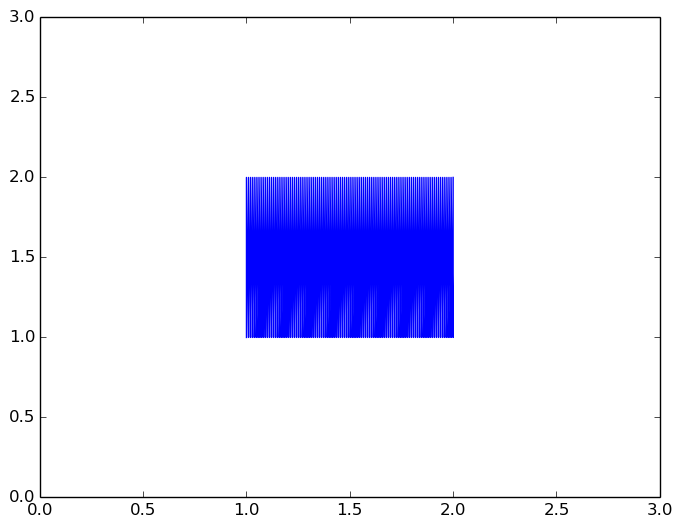

4-element Array{Int64,1}:
 0
 3
 0
 3

In [117]:
plot(p,q)
axis([0, 3, 0, 3])

In [118]:
function f(Xspan::Array{Vector})
    Yspan=Vector[]
    for i=1:length(Xspan)
        x=Xspan[i][1]*2+Xspan[i][2]
        y=Xspan[i][1]+Xspan[i][2]
        push!(Yspan,[x,y])
    end
    return Yspan
end

f (generic function with 2 methods)

In [119]:
Yrombo=f(Xspan)

10000-element Array{Array{T,1},1}:
 [3.0,2.0]        
 [3.0101,2.0101]  
 [3.0202,2.0202]  
 [3.0303,2.0303]  
 [3.0404,2.0404]  
 [3.05051,2.05051]
 [3.06061,2.06061]
 [3.07071,2.07071]
 [3.08081,2.08081]
 [3.09091,2.09091]
 [3.10101,2.10101]
 [3.11111,2.11111]
 [3.12121,2.12121]
 ⋮                
 [5.88889,3.88889]
 [5.89899,3.89899]
 [5.90909,3.90909]
 [5.91919,3.91919]
 [5.92929,3.92929]
 [5.93939,3.93939]
 [5.94949,3.94949]
 [5.9596,3.9596]  
 [5.9697,3.9697]  
 [5.9798,3.9798]  
 [5.9899,3.9899]  
 [6.0,4.0]        

In [121]:
p=Float64[]
for i=1:length(Yrombo)
    push!(p,Yrombo[i][1])
end
q=Float64[]
for i=1:length(Yrombo)
    push!(q,Yrombo[i][2])
end;

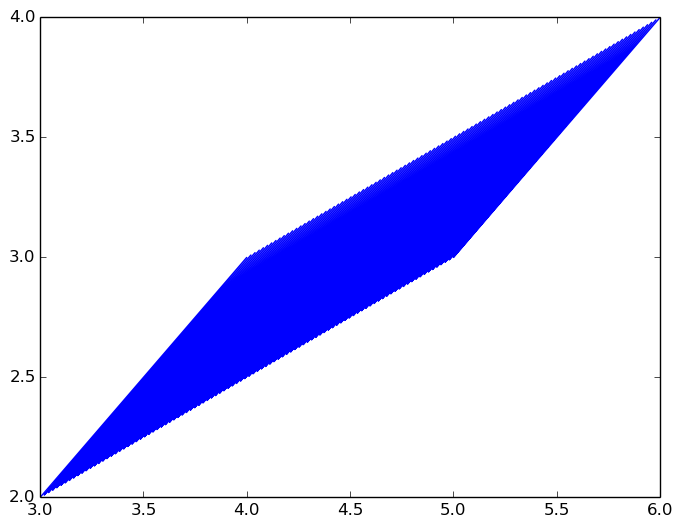

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feaeae75bd0>

In [122]:
plot(p,q)

Hemos logrado acotar el área en el cual mapea la función. Exactamente como antes, el mapeo de una funciòn actuando sobre intervalos contiene el rango, sin embargo, "lo exagera".

In [141]:
findfirst(Yrombo,[4.0,3.0])

100

In [142]:
Yrombo[100]

2-element Array{Float64,1}:
 4.0
 3.0

In [128]:
function FindEdge(x::Array{Vector})
    find=Float64[]
    for i=1:length(x)
        push!(find,x[i][1]-x[i][2])
    end
    find
end

FindEdge (generic function with 1 method)

In [145]:
findfirst(FindEdge(Yrombo),2)

9901

In [138]:
Yrombo[9901]

2-element Array{Float64,1}:
 5.0
 3.0

Los ejes del paralelogramo están en $(3, 2), (4, 3), (5, 3), (6, 4)$. Y su área $\sqrt{5*2} \sin{45º}u^2$

In [149]:
sqrt(5*2)sin(45)

2.6907932065927795

El problema de la "exageraciòn" es que en mi representaciòn, sòlo puedo mapear rentàngulos en rectàngulos (producto cartesiano de intervalos) de tal manera que el paralelogramo respuesta no puede ser representado bajo mis estatutos.

[5] Haz lo mismo para la imagen del cuadrado unitario bajo la función 

$$ \begin{pmatrix} x \\ y \end{pmatrix} \mapsto 
\begin{pmatrix} 1 - ax^2 + y \\ b x \end{pmatrix},$$

con $a = 1.4$ y $b=0.3$ (el famoso "mapeo de Hénon").

In [27]:
function Henon(X::MultiInterval)
    x=1-(X.intervalos[1]^2)*1.4+X.intervalos[2]
    y=X.intervalos[1]*0.3
    return MultiInterval([x,y])
end

Henon (generic function with 1 method)

In [153]:
function f(Xspan::Array{Vector})
    Yspan=Vector[]
    for i=1:length(Xspan)
        x=1-(Xspan[i][1]^2)*1.4+Xspan[i][1]
        y=Xspan[i][1]*0.3
        push!(Yspan,[x,y])
    end
    return Yspan
end

Xspan=Vector[]
for i=1:length(Xspan1)
    for j=1:length(Xspan1)
        push!(Xspan,[Xspan1[i],Xspan2[j]])
    end
end

Yrombo=f(Xspan)


p=Float64[]
for i=1:length(Yrombo)
    push!(p,Yrombo[i][1])
end
q=Float64[]
for i=1:length(Yrombo)
    push!(q,Yrombo[i][2])
end;

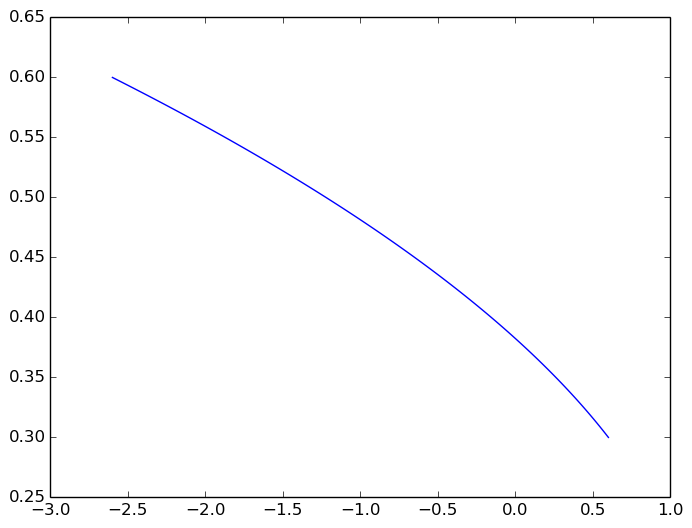

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feaeacd3250>

In [156]:
plot(p,q)

In [42]:
X1=Interval(1,2)
X2=Interval(1,2)
X=MultiInterval([X1,X2])
Henon(X)

MultiInterval(2,[Interval(1.4,6.6),Interval(0.3,0.6)])

In [43]:
Area(X)

1

In [44]:
Area(Henon(X))

1.5599999999999998